# SMP Pintura

In [28]:
import pandas as pd
import numpy as np
from scipy import stats


In [5]:
pd.set_option('display.max_columns', 500)

In [29]:
from os.path import join

DATADIR = 'data'
FILENAME = 'smp-pint.csv'

datapath = join(DATADIR, FILENAME)

In [30]:
df = pd.read_csv(datapath, sep=';')

In [7]:
# Rename and keep columns
df.rename(columns={'Fecha y hora':'start', 'Zona':'zone', 'Fin':'end'}, inplace=True)
df = df[['zone','start','end']]

In [8]:
# Set datetime
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)

In [9]:
# Compute duration and filter at least 1 minute
df['duration'] = df.end-df.start
df = df[df['duration'] > pd.Timedelta(1,'m')]

In [10]:
df.sort_values(by='duration', ascending=False)

,zone,start,end,duration
13460,3101 - B_PB_FLAM,2020-01-01 12:01:00,2020-02-01 06:03:00,30 days 18:02:00
13466,3102 - B_PB_APP,2020-01-01 12:01:00,2020-02-01 06:00:00,30 days 17:59:00
13465,3103 - B_PB_BASE,2020-01-01 12:01:00,2020-02-01 06:00:00,30 days 17:59:00
13462,3104 - B_PB_VERN,2020-01-01 12:01:00,2020-02-01 06:00:00,30 days 17:59:00
13464,3202 - B.MANUT_Z2,2020-01-01 12:01:00,2020-02-01 05:34:00,30 days 17:33:00
...,...,...,...,...
8963,3201 - B.MANUT_Z1,2020-09-28 09:53:00,2020-09-28 09:55:00,0 days 00:02:00
8969,3201 - B.MANUT_Z1,2020-09-28 08:23:00,2020-09-28 08:25:00,0 days 00:02:00
8972,3201 - B.MANUT_Z1,2020-09-28 08:06:00,2020-09-28 08:08:00,0 days 00:02:00
8973,3201 - B.MANUT_Z1,2020-09-28 08:04:00,2020-09-28 08:06:00,0 days 00:02:00


In [11]:
# Keep 2020 data
df = df[df.start >= '2020-01-01']
df = df[df.end < '2021-01-01']

In [26]:
df['dpto'] = 'PINT'

C:\Users\pm18419.CORP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.zone.unique()

array([' 3104 - B_PB_VERN', ' 3102 - B_PB_APP', ' 3202 - B.MANUT_Z2',
       ' 3101 - B_PB_FLAM', ' 3203 - B.MANUT_Z3', ' 3201 - B.MANUT_Z1',
       ' 3103 - B_PB_BASE', ' 3301 - CA_APRESTO', ' 3307 - DILUCION',
       ' 3303 - CAB_BARNIZ', ' 3305 - TRAT.BARRO', ' 3302 - CAB_BASE',
       ' 3304 - GRUPO AIRE', ' 3306 - HORNO'], dtype=object)

In [27]:
df[['zone','start','end', 'dpto']].to_csv('smp-pint-pp.csv')

In [21]:
df['dur_seconds'] = df['duration'].dt.total_seconds()/3600

C:\Users\pm18419.CORP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


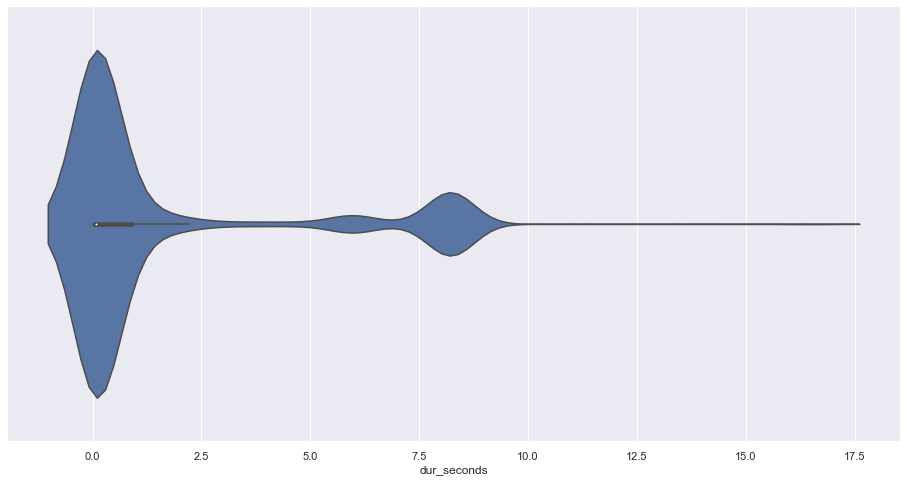

In [22]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

ax = sns.violinplot(x=df['dur_seconds'])

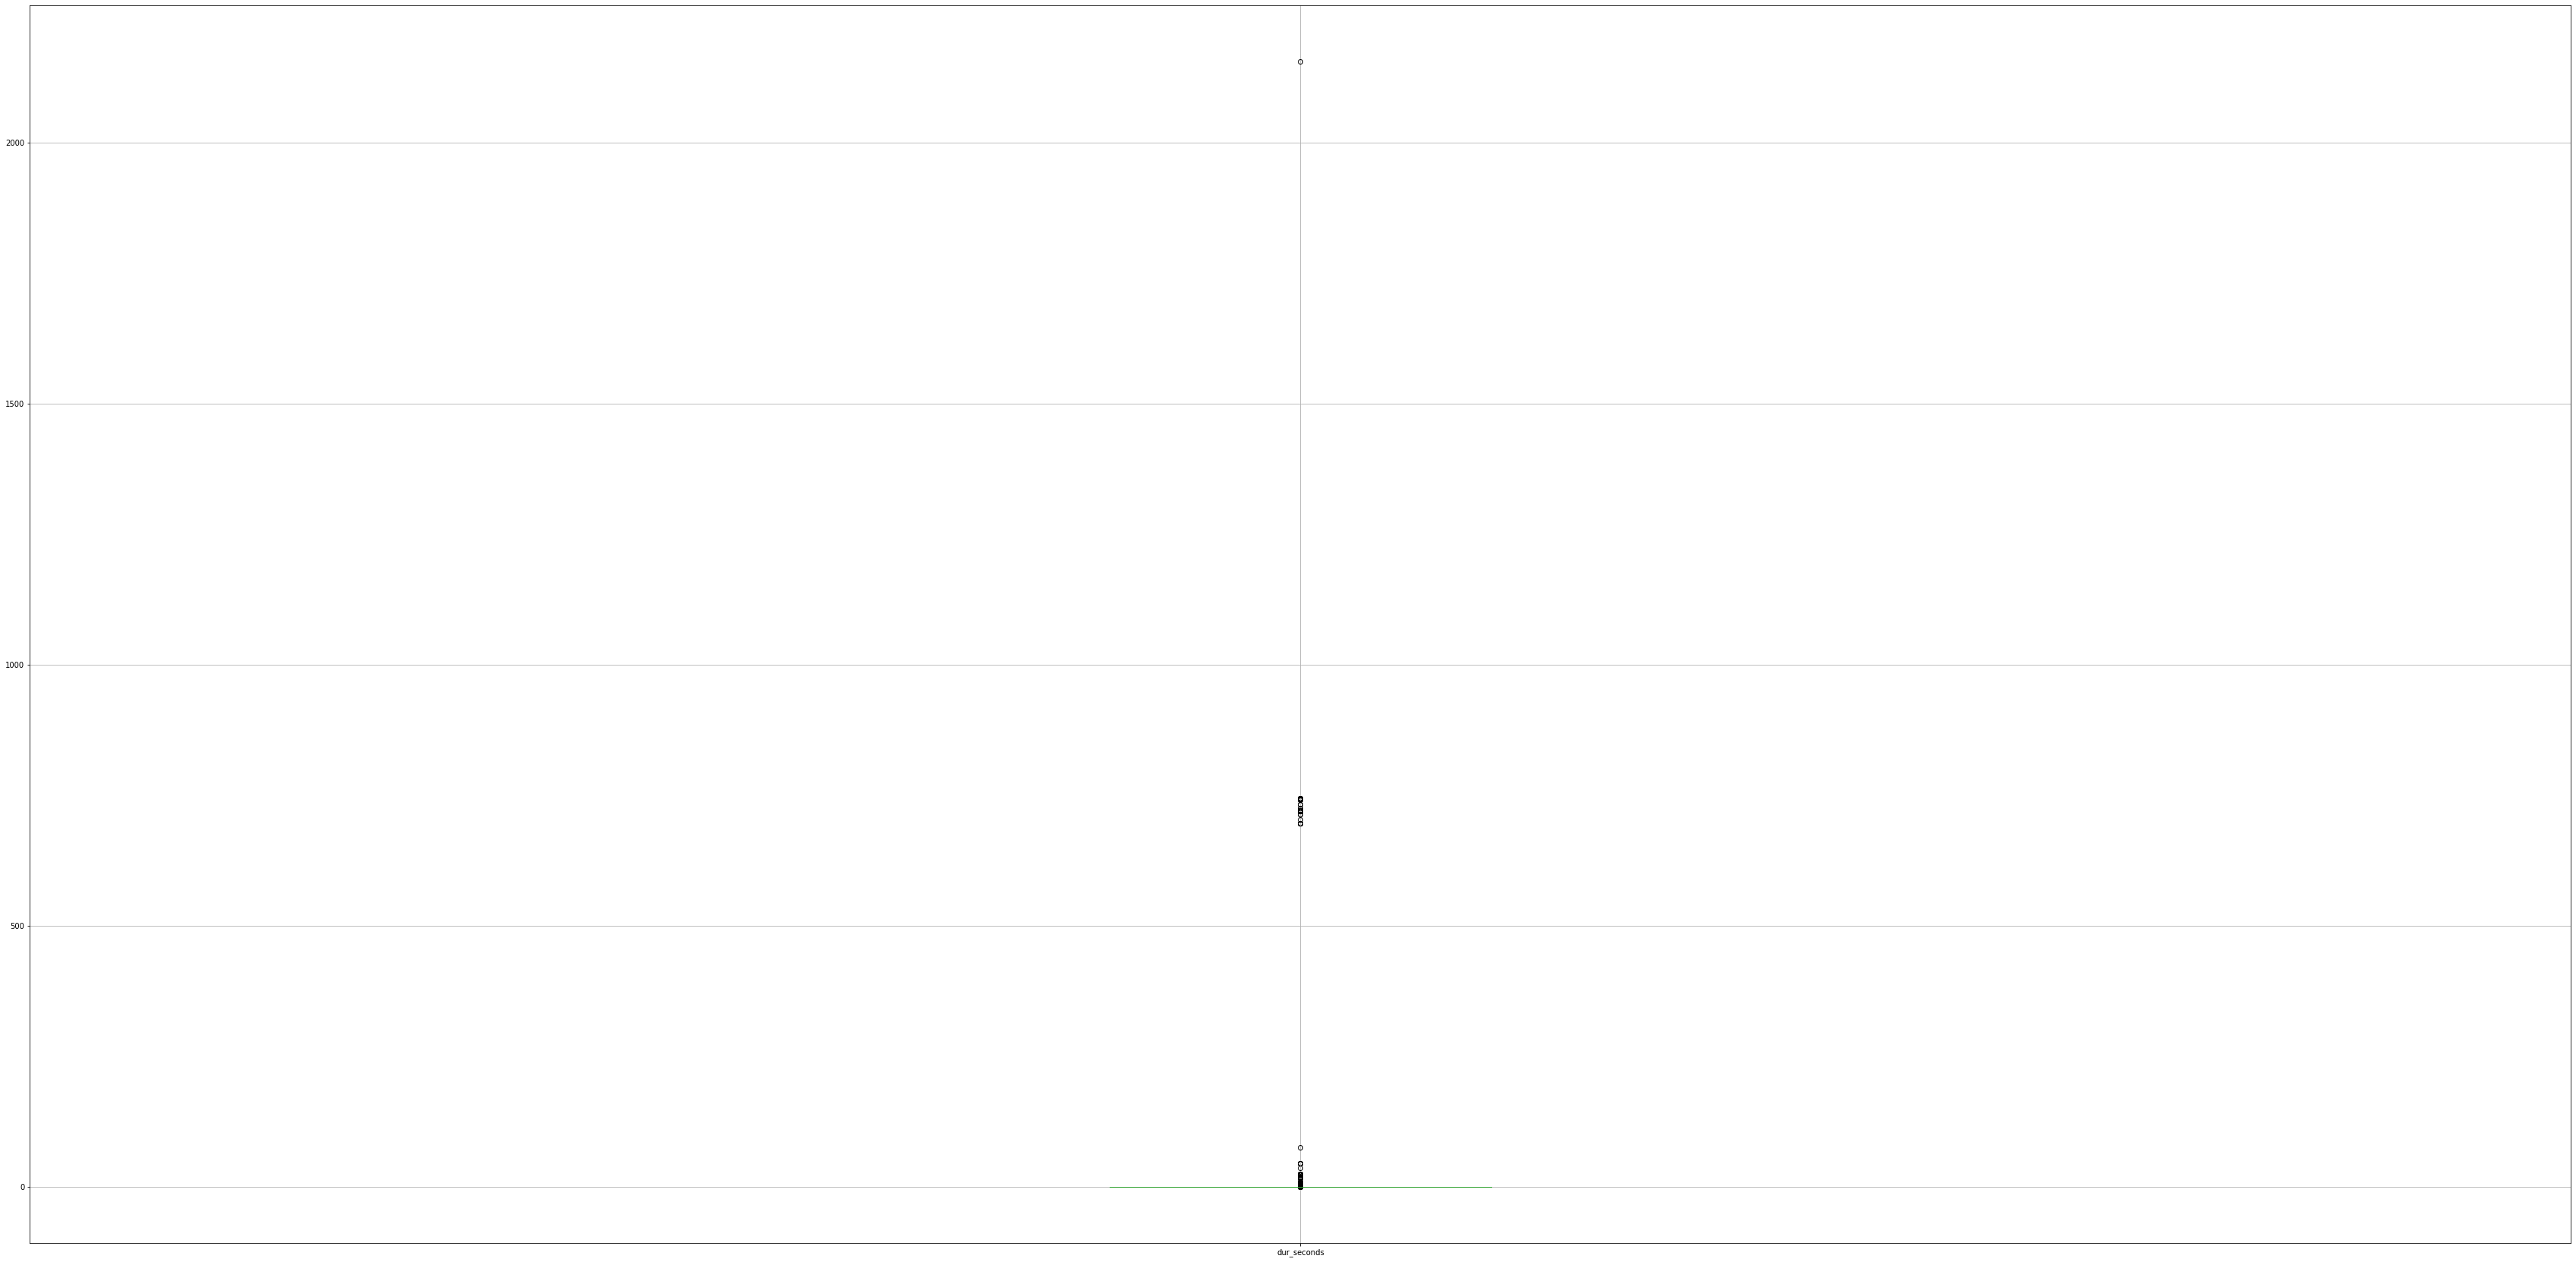

In [104]:
ax = df.boxplot(column=['dur_seconds'], figsize=(60,30))
#ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('boxplot.png')

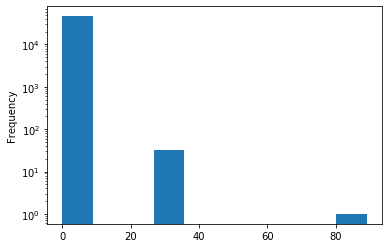

In [105]:
df['duration'].astype('timedelta64[D]').plot.hist(log=True)

In [106]:

df[(np.abs(stats.zscore(df['duration'].dt.total_seconds())) < 3).all(axis=1)]

AxisError: axis 1 is out of bounds for array of dimension 1

In [66]:
df['duration'].dt.total_seconds()

8         120.0
9         120.0
20        120.0
25        120.0
26        180.0
          ...  
117433    120.0
117434    360.0
117436    240.0
117438    300.0
117439    120.0
Name: duration, Length: 46429, dtype: float64

In [20]:
df = df[np.abs(stats.zscore(df['duration'].dt.total_seconds()))<3]

In [109]:
df['dur_seconds'] = df['duration'].dt.total_seconds()/3600

C:\Users\pm18419.CORP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


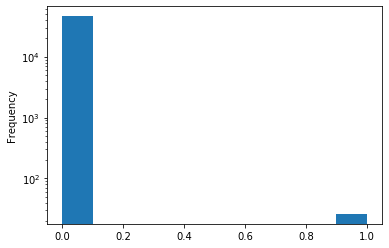

In [112]:
df['duration'].astype('timedelta64[D]').plot.hist(log=True)

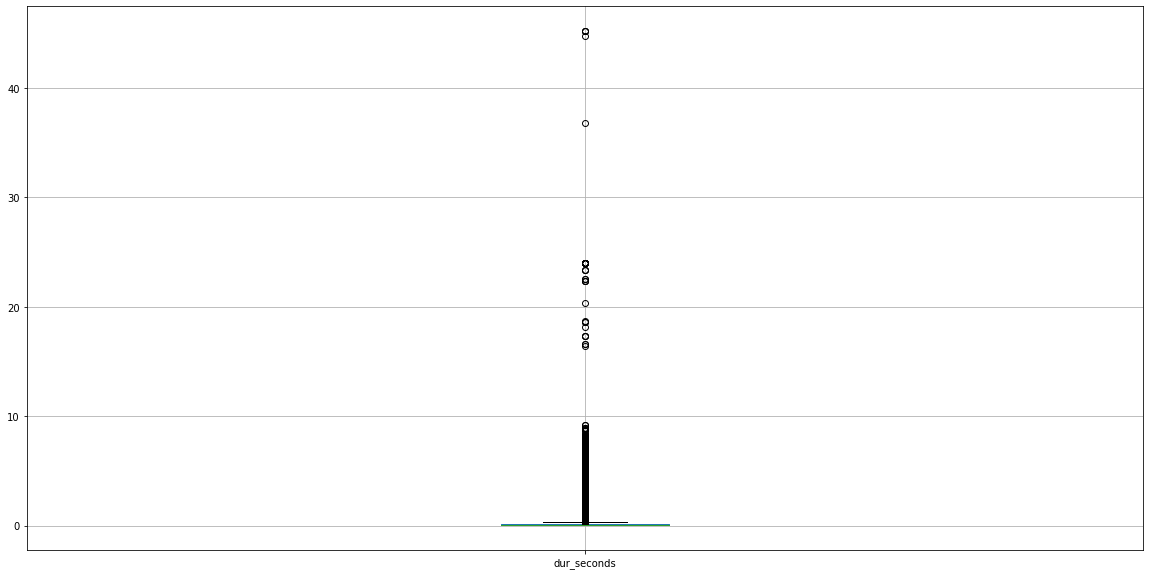

In [111]:
ax = df.boxplot(column=['dur_seconds'], figsize=(20,10))
#ax = s.hist()  # s is an instance of Series
fig = ax.get_figure()
fig.savefig('boxplot.png')

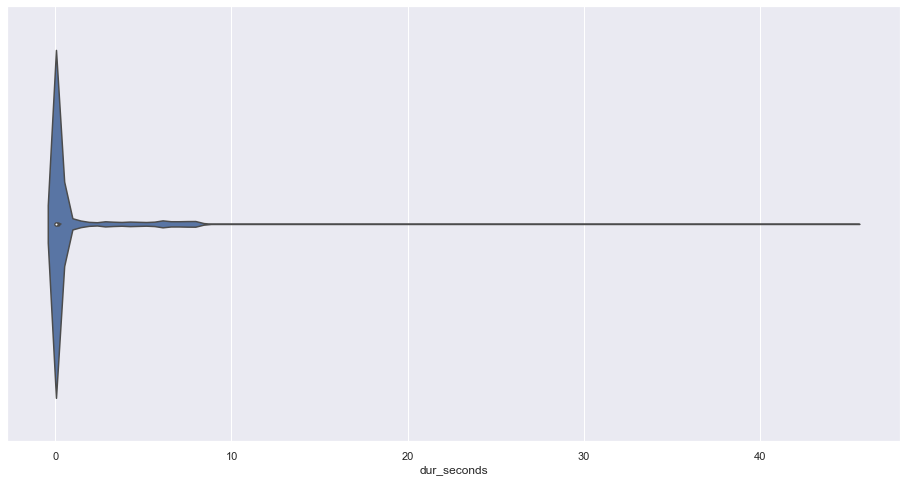

In [118]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})

ax = sns.violinplot(x=df['dur_seconds'])
#sns.violinplot(x="day", y="total_bill", data=tips)

In [116]:
ax.fi